### NLP Assignment 6

#### Atsu Atakpa

In [1]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('**THE SOFTWARE PACKAGES USED FOR THIS ASSIGNMENT ARE:**')
import sys;

print('system (python) info')
print(sys.version)
print('')

import nltk; print( 'nltk ' + nltk.__version__)
from nltk import word_tokenize;

import bs4; print( 'bs4 ' + bs4.__version__)
from bs4 import BeautifulSoup, SoupStrainer;

import re; print('re ' + re.__version__)
import requests; print('requests ' + requests.__version__)

import sklearn; print( 'sklearn ' + sklearn.__version__)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

import pandas as pd; print( 'pandas ' + pd.__version__)

import seaborn as sn; print( 'seaborn ' + sn.__version__)

import matplotlib; print( 'matplotlib ' + matplotlib.__version__)
import matplotlib.pyplot as plt

**THE SOFTWARE PACKAGES USED FOR THIS ASSIGNMENT ARE:**

system (python) info
2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:09) [MSC v.1500 64 bit (AMD64)]

nltk 3.3
bs4 4.6.0
re 2.2.1
requests 2.18.4
sklearn 0.19.1
pandas 0.23.0
seaborn 0.8.1
matplotlib 2.2.2


##### Question 1
Evaluate text similarity of Amazon book search results by doing the following: 
a. Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results. 

b. In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one.

c. Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?

###### The search criteria I used for book on amazon was "Trump"

In [2]:
# Creating a list of book titles to compare
book_titles = [
    "Proof of Collusion: How Trump Betrayed America",
    "Why Polls Don’t Matter In the Age of Trump: And Other Observations",
    "The Rebirth of the Philosopher King: Trump's Campaign and the Leadership of the Information Age",
    "The Nasty Woman's Guide to Surviving Trump",
    "Fear: Trump in the White House",
    "The Trump Prophecies: The Astonishing True Story of the Man Who Saw Tomorrow... and What He Says Is Coming Next",
    "Fire and Fury: Inside the Trump White House",
    "Everything Trump Touches Dies: A Republican Strategist Gets Real About the Worst President Ever",
    "Trump's America: The Truth about Our Nation's Great Comeback",
    "House of Trump, House of Putin: The Untold Story of Donald Trump and the Russian Mafia",
    "Trump: The Art of the Deal",
    "God and Donald Trump",
    "Born Trump: Inside America’s First Family",
    "Great Again: How to Fix Our Crippled America",
    "Trump Aftershock: The President's Seismic Impact on Culture and Faith in America",
    "The Dangerous Case of Donald Trump: 27 Psychiatrists and Mental Health Experts Assess a President",
    "The Case Against Impeaching Trump",
    "Donald J. Trump: A President Like No Other",
    "Spygate: The Attempted Sabotage of Donald J. Trump",
    "The Apprentice: Trump, Russia and the Subversion of American Democracy",
    "The America We Deserve",
    "Whose Boat Is This Boat?: Comments That Don't Help in the Aftermath of a Hurricane",
    "The Beautiful Poetry of Donald Trump (Canons)",
    "Killing the Deep State: The Fight to Save President Trump",
    "Liars, Leakers, and Liberals: The Case Against the Anti-Trump Conspiracy",
]

In [3]:
# Checking the number of book titles
len(book_titles)

25

In [4]:
def compare_titles(book_titles):
    # used with assistance from https://stackoverflow.com/questions/8897593/similarity-between-two-text-documents
    tfidf = TfidfVectorizer(min_df=1).fit_transform(book_titles)
    pairwise_similarity = (tfidf * tfidf.T).toarray()
    pairwise_df = pd.DataFrame(pairwise_similarity)
    sn.heatmap(pairwise_df)
    sn.set(rc={'figure.figsize':(18,12)})
    plt.show()
    return pairwise_df

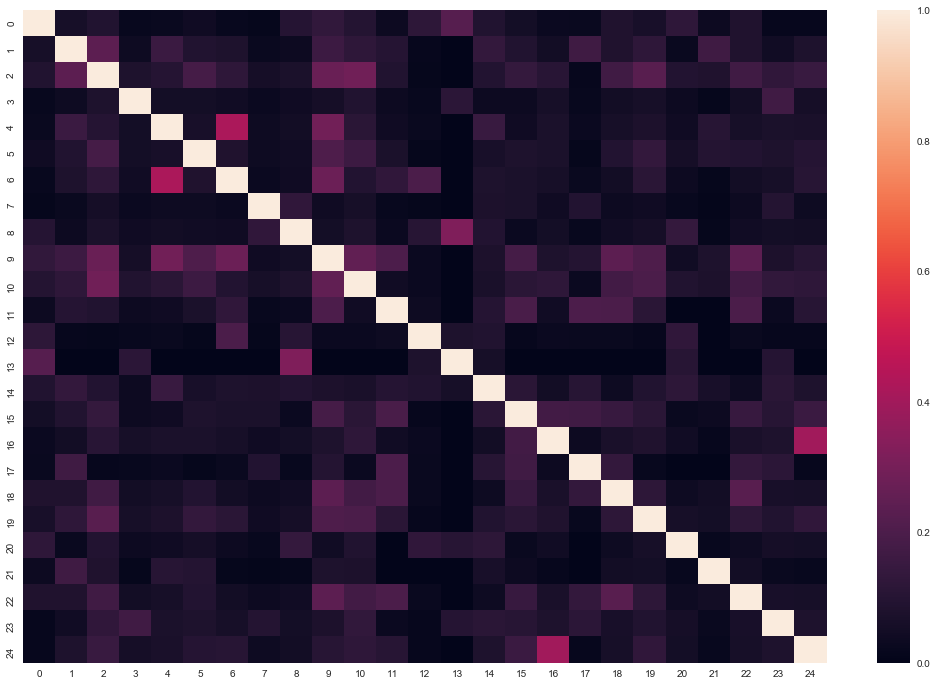

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.000000,0.058751,0.088026,0.021072,0.025974,0.041616,0.021421,0.014356,0.099526,0.131943,...,0.053310,0.028552,0.023891,0.082425,0.065859,0.123789,0.031574,0.082425,0.017968,0.017237
1,0.058751,1.000000,0.241942,0.035270,0.155066,0.089573,0.081246,0.024029,0.031777,0.156407,...,0.087226,0.047788,0.164495,0.084886,0.124755,0.026319,0.167518,0.084886,0.046279,0.080925
2,0.088026,0.241942,1.000000,0.080680,0.099446,0.182853,0.121697,0.054967,0.072690,0.272799,...,0.138014,0.109316,0.016120,0.169698,0.229936,0.092034,0.082520,0.169698,0.125462,0.152295
3,0.021072,0.035270,0.080680,1.000000,0.054496,0.051909,0.044942,0.030121,0.039833,0.058373,...,0.032003,0.059904,0.023114,0.049482,0.060842,0.032992,0.014308,0.049482,0.171771,0.055654
4,0.025974,0.155066,0.099446,0.054496,1.000000,0.063983,0.424897,0.037128,0.049099,0.289075,...,0.039447,0.073838,0.028491,0.060991,0.074994,0.040666,0.101645,0.060991,0.071506,0.068599
5,0.041616,0.089573,0.182853,0.051909,0.063983,1.000000,0.084921,0.035365,0.046768,0.206581,...,0.081277,0.070333,0.013061,0.090264,0.136527,0.055929,0.096318,0.090264,0.078699,0.101373
6,0.021421,0.081246,0.121697,0.044942,0.424897,0.084921,1.000000,0.030619,0.040491,0.275963,...,0.073722,0.060894,0.023496,0.050299,0.112733,0.033537,0.014545,0.050299,0.058971,0.103119
7,0.014356,0.024029,0.054967,0.030121,0.037128,0.035365,0.030619,1.000000,0.126261,0.039769,...,0.070331,0.040812,0.091756,0.033712,0.041451,0.022477,0.009748,0.033712,0.096686,0.037916
8,0.099526,0.031777,0.072690,0.039833,0.049099,0.046768,0.040491,0.126261,1.000000,0.052592,...,0.028834,0.053972,0.020825,0.044581,0.054817,0.137626,0.012891,0.044581,0.052267,0.050142
9,0.131943,0.156407,0.272799,0.058373,0.289075,0.206581,0.275963,0.039769,0.052592,1.000000,...,0.183249,0.079092,0.095250,0.241972,0.203459,0.043560,0.079388,0.241972,0.076594,0.103708


In [11]:
compare_titles(book_titles)

In [6]:
book_titles[5:12]

['The Trump Prophecies: The Astonishing True Story of the Man Who Saw Tomorrow... and What He Says Is Coming Next',
 'Fire and Fury: Inside the Trump White House',
 'Everything Trump Touches Dies: A Republican Strategist Gets Real About the Worst President Ever',
 "Trump's America: The Truth about Our Nation's Great Comeback",
 'House of Trump, House of Putin: The Untold Story of Donald Trump and the Russian Mafia',
 'Trump: The Art of the Deal',
 'God and Donald Trump']

In [7]:
print(book_titles[19])
print(book_titles[0])

The Apprentice: Trump, Russia and the Subversion of American Democracy
Proof of Collusion: How Trump Betrayed America


In [8]:

print(book_titles[21])
print(book_titles[24])

Whose Boat Is This Boat?: Comments That Don't Help in the Aftermath of a Hurricane
Liars, Leakers, and Liberals: The Case Against the Anti-Trump Conspiracy


##### Question 2
Now evaluate using a major search engine. 
a. Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results. 

b. Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title). 

c. Which one has the highest similarity measure?

#### Search conducted in google

In [9]:
titles_search = [
    "Fear: Trump in the White House by Bob Woodward, Hardcover ...https://www.barnesandnoble.com/w/fear-bob-woodward/1129202161 Rating: 3.9 - ‎54 reviews Sep 11, 2018 - THE INSIDE STORY ON PRESIDENT TRUMP, AS ONLY BOB WOODWARD CAN TELL IT. ... Nothing in Bob Woodward's sober and grainy new book, Fear: Trump in the White House, is especially surprising… You turn the pages because Woodward, as he accumulates the queasy-making details, delivers on the ...",
    "THE INSIDE STORY ON PRESIDENT TRUMP, AS ONLY BOB WOODWARD CAN TELL IT With authoritative reporting honed through eight presidencies from Nixon to Obama, author Bob Woodward reveals in unprecedented detail the harrowing life inside President Donald Trump’s White House and precisely how he makes decisions on major foreign and domestic policies. Woodward draws from hundreds of hours of interviews with firsthand sources, meeting notes, personal diaries, files and documents. The focus is on the explosive debates and the decision-making in the Oval Office, the Situation Room, Air Force One and the White House residence.",
    "The inside story on President Trump, as only Bob Woodward can tell it  With authoritative reporting honed through eight presidencies from Nixon to Obama, author Bob Woodward reveals in unprecedented detail the harrowing life inside President Donald Trump’s White House and precisely how he makes decisions on major foreign and domestic policies.  Woodward draws from hundreds of hours of interviews with firsthand sources, meeting notes, personal diaries, files, and documents. The focus is on the explosive debates and the decision-making in the Oval Office, the Situation Room, Air Force One, and the White House residence. Fear is the most intimate portrait of a sitting president ever published during the president’s first years in office."
]

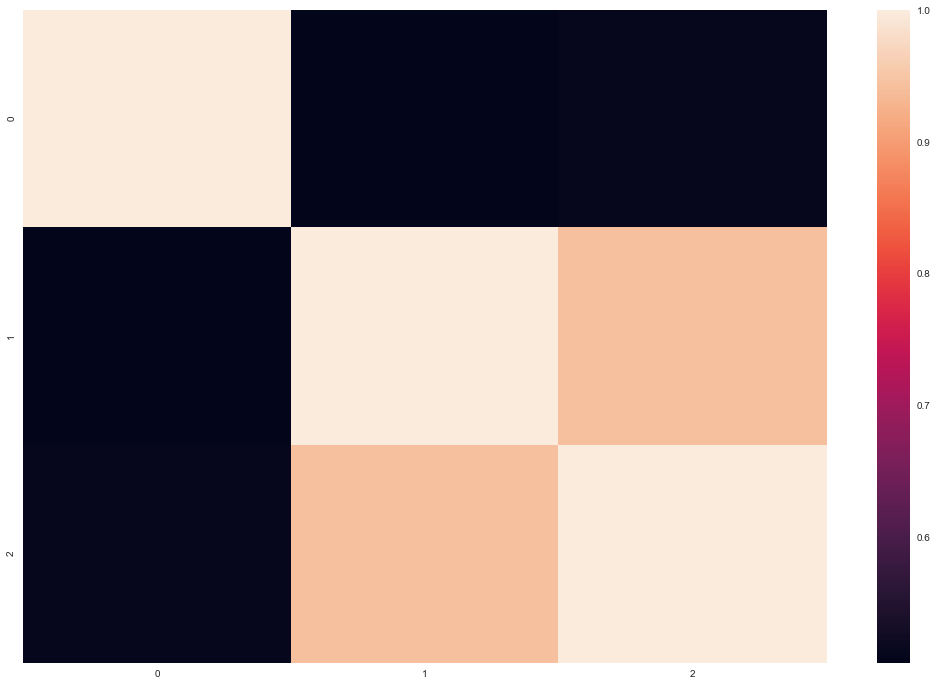

,0,1,2
0,1.000000,0.504426,0.511256
1,0.504426,1.000000,0.943183
2,0.511256,0.943183,1.000000


In [13]:
compare_titles(titles_search)

The highest text similarity is between the second and third search results

##### Assistance: KJ Price